In [1]:
from os import getcwd
from os.path import join

from IPython.display import HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
cwd = getcwd()
data_dir = join(cwd, 'dataset')

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
dataset_base = join(data_dir, 'DATASET_BASE_1990.csv')
emissions_base_df = pd.read_csv(dataset_base, index_col=0)

with open('emissions_base.html', mode='w', encoding='utf8') as file_object:
    file_object.write(emissions_base_df.loc[:, 'CF4':'C5F8'].to_html())

HTML(emissions_base_df.to_html())

,CO2,CH4,N2O,HFC-23,HFC-410A,HFC-43-10mee,HFC-125,HFC-134,HFC-134a,HFC-404A,HFC-407C,HFC-507a,HFC-152a,HFC-227ea,HFC-236fa,HFC-365mfc/227ea,HFC-365mfc,HFC-245fa,HFC-32,CF4,C2F6,C3F8,C4F6,c-C4F8,C5F8,NF3,SF6,EMISIONES NETAS Gg en CO2e,EMISIONES (sin 3B y 3D) Gg en CO2e,Unnamed: 30,Carbono negro (Gg)
[1] Energía,"352,617.358","27,077.324","3,305.396",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"383,000.078",NaN,NaN,NaN
[1A] Actividades de quema del combustible,"332,949.063","3,100.750","3,272.178",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"339,321.990",NaN,NaN,NaN
[1A1] Industrias de la energía,"138,687.864",142.293,293.389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"139,123.547",NaN,NaN,NaN
[1A1a] Actividad principal producción de electricidad y calor,"106,336.324",119.227,257.973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"106,713.524",NaN,NaN,NaN
[1A1b] Refinación del petróleo,"11,587.266",10.148,17.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"11,614.938",NaN,NaN,1.817
[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,"20,764.274",12.918,17.892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"20,795.084",NaN,NaN,0.233
[1A2] Industrias manufactura y de la construcción,"53,367.609",82.516,116.681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"53,566.807",NaN,NaN,1.616
[1A2a] Hierro y acero,"4,773.225",3.321,4.901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,781.447",NaN,NaN,0.099
[1A2b] Metales no ferrosos,"2,960.868",1.909,2.635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,965.412",NaN,NaN,0.032
[1A2c] Sustancias químicas,"16,468.899",10.420,14.130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"16,493.448",NaN,NaN,0.234


In [5]:
emissions_base_df['CO2']

[1] Energía                                                                        352,617.358
[1A] Actividades de quema del combustible                                          332,949.063
[1A1] Industrias de la energía                                                     138,687.864
[1A1a] Actividad principal producción de electricidad y calor                      106,336.324
[1A1b] Refinación del petróleo                                                      11,587.266
[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía         20,764.274
[1A2] Industrias manufactura y de la construcción                                   53,367.609
[1A2a] Hierro y acero                                                                4,773.225
[1A2b] Metales no ferrosos                                                           2,960.868
[1A2c] Sustancias químicas                                                          16,468.899
[1A2d] Pulpa, papel e imprenta                    

In [6]:
ghg_file_path = join(data_dir, 'DATASET_GHG_EMISSIONS.csv')
co2_file_path = join(data_dir, 'DATASET_CO2_EMISSIONS.csv')
ch4_file_path = join(data_dir, 'DATASET_CH4_EMISSIONS.csv')
n2o_file_path = join(data_dir, 'DATASET_n2o_EMISSIONS.csv')

ghg_df = pd.read_csv(ghg_file_path, index_col=0)
co2_df = pd.read_csv(co2_file_path, index_col=0)
ch4_df = pd.read_csv(ch4_file_path, index_col=0)
n2o_df = pd.read_csv(n2o_file_path, index_col=0)

co2_df = co2_df.fillna(0)
ch4_df = ch4_df.fillna(0)
n2o_df = n2o_df.fillna(0)

In [7]:
ghg_df.dtypes

CO2    float64
CH4    float64
N2O    float64
dtype: object

In [8]:
with open('ghg_df.html', mode='w', encoding='utf8') as file_object:
    file_object.write(ghg_df.to_html())
ghg_df

,CO2,CH4,N2O
Year,,,
1990,319999.8455,117840.4201,28337.97300
1991,329716.3529,119392.8666,27177.03342
1992,333049.7117,117998.4615,27988.13134
1993,338075.1071,118275.3551,26219.01096
1994,360853.3477,124026.1810,28335.69607
1995,347496.6454,127038.4565,28258.99299
1996,359553.2713,131254.5972,27629.11144
1997,375317.2362,138365.1189,29935.23041
1998,393944.4869,143331.7863,30056.78095


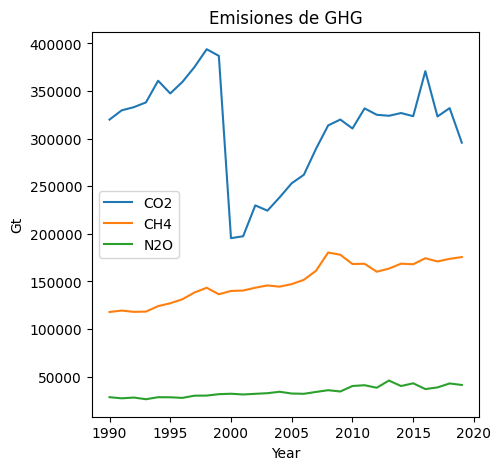

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(ghg_df['CO2'], label="CO2")
ax.plot(ghg_df['CH4'], label="CH4")
ax.plot(ghg_df['N2O'], label="N2O")
ax.set_xlabel('Year')
ax.set_ylabel('Gt')
ax.set_title('Emisiones de GHG')
ax.legend()

In [10]:
dfs = [co2_df, ch4_df, n2o_df]

In [11]:
co2_df["[2B9] Producción fluoroquímica"] = dfs[0]["[2B9] Producción fluoroquímica"].fillna(0)
co2_df["[2B9] Producción fluoroquímica"].dtype == 'O'

True

In [12]:
for df in dfs:
    for col in df.columns:
        if df[col].dtype == 'O':
            df[col] = df[col].replace(' ', 0);
        if df[col].mean() < 1:
            df.drop(columns=col)
        else:
            print(f"Passed {col}")

Passed [1] Energía
Passed [1A] Actividades de quema del combustible
Passed [1A1] Industrias de la energía
Passed [1A1a] Actividad principal producción de electricidad y calor
Passed [1A1b] Refinación del petróleo
Passed [1A1c] Manufactura de combustibles sólidos y otras industrias de la energía
Passed [1A2] Industrias manufactura y de la construcción
Passed [1A2a] Hierro y acero
Passed [1A2b] Metales no ferrosos
Passed [1A2c] Sustancias químicas
Passed [1A2d] Pulpa, papel e imprenta
Passed [1A2e] Procesamiento de alimentos, bebidas y tabaco
Passed [1A2g] Equipo de transporte
Passed [1A2i] Minería (con excepción de combustibles) y cantería
Passed [1A2k] Construcción
Passed [1A2m] Industria no especificada
Passed [1A3] Transporte
Passed [1A3a] Aviación civil
Passed [1A3b] Autotransporte
Passed [1A3c] Ferrocarriles
Passed [1A3d] Navegación marítima y fluvial
Passed [1A4] Otros sectores
Passed [1A4a] Comercial/institucional
Passed [1A4b] Residencial
Passed [1A4c] Agropecuario/silvicultura/

In [13]:
HTML(co2_df.to_html())

,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,[1A2c] Sustancias químicas,"[1A2d] Pulpa, papel e imprenta","[1A2e] Procesamiento de alimentos, bebidas y tabaco",[1A2f] Minerales no metálicos,[1A2g] Equipo de transporte,[1A2h] Maquinaria,[1A2i] Minería (con excepción de combustibles) y cantería,[1A2j] Madera y productos de la madera,[1A2k] Construcción,[1A2l] Textiles y cueros,[1A2m] Industria no especificada,[1A3] Transporte,[1A3a] Aviación civil,[1A3b] Autotransporte,[1A3c] Ferrocarriles,[1A3d] Navegación marítima y fluvial,[1A3e] Otro transporte,[1A4] Otros sectores,[1A4a] Comercial/institucional,[1A4b] Residencial,[1A4c] Agropecuario/silvicultura/pesca/piscifactorías,[1B] Emisiones fugitivas provenientes de la fabricación de combustibles,[1B1] Combustibles sólidos,[1B1a] Minería carbonífera y manejo del carbón,[1B1ai] Minas subterráneas,[1B1aii] Minas superficie,[1B1b] Combustión espontánea y vertederos para quema de carbón,[1B2] Petróleo y gas natural,[1B2a] Petróleo,1B2ai Venteo petróleo,1B2aii Quemado petróleo,1B2aiii Otras fugitivas petróleo,[1B2b] Gas natural,1B2bi Venteo gas natural,1B2bii Quemado gas natural,1B2biii Otras fugitivas gas natural,[2] Procesos industriales y uso de productos,[2A] Industria de los minerales,[2A1] Producción de cemento,[2A2] Producción de cal,[2A3] Producción de vidrio,[2A4] Otros usos de carbonatos,[2A5] Otros,[2B] Industria química,[2B1] Producción de amoniaco,[2B2] Producción de ácido nítrico,[2B3] Producción de ácido adípico,"[2B4] Producción de caprolactama, glioxil y ácido glioxílico",[2B5] Producción de carburo,[2B6] Producción de dióxido de titanio,[2B7] Producción de ceniza de sosa,[2B8] Producción petroquímica y negro de humo,[2B9] Producción fluoroquímica,[2B10] Otros,[2C] Industria de los metales,[2C1] Producción de hierro y acero,[2C2] Producción de ferroaleaciones,[2C3] Producción de aluminio,[2C4] Producción de magnesio,[2C5] Producción de plomo,[2C6] Producción de zinc,[2C7] Otros,[2D] Uso de productos no energéticos de combustibles y de solvente,[2D1] Uso de lubricantes,[2D2] Uso de la cera de parafina,[2D3] Uso de solventes,[2D4] Otros,[2E] Industria electrónica,[2E1] Circuitos integrados o semiconductores,[2E2] Pantalla plana tipo TFT,[2E3] Células fotovoltaicas,[2E4] Fluido de transferencia térmica,[2E5] Otros,[2F] Uso de productos sustitutos de las sustancias que agotan la capa de ozono,[2F1] Refrigeración y aire acondicionado,[2F2] Agentes espumantes,[2F3] Protección contra incendios,[2F4] Aerosoles,[2F5] Solventes,[2F6] Otras aplicaciones,[2G] Manufactura y utilización de otros productos,[2G1] Equipos eléctricos,[2G2] SF6 y PFC de otros usos de productos,[2G3] N2O de usos de productos,[2G4] Otros,[2H] Otros,[2H1] Industria de la pulpa y el papel,[2H2] Industria de la alimentación y las bebidas,[2H3] Otros,"[3] Agricultura, silvicultura y otros usos de la tierra",[3A] Ganado,[3A1] Fermentación entérica,[3A1a] Bovino,[3A1b] Búfalos,[3A1c] Ovinos,[3A1d] Caprino,[3A1e] Camello,[3A1f] Caballos,[3A1g] Mulas y asnos,[3A1h] Porcinos,[3A1i] Otros (especificar),[3A2] Gestión del estiércol,[3A2a] Bovinos,[3A2b] Búfalos,[3A2c] Ovinos,[3A2d] Caprino,[3A2e] Camello,[3A2f] Caballos,[3A2g] Mulas y asnos,[3A2h] Porcinos,[3A2i] Aves de corral,[3A2g] Otros (especificar),[3B] Tierra,[3B1] Tierra forestales,[3B1a] Tierras forestales que permanecen como tal,[3B1b] Tierras convertidas a tierras forestales,[3B2] Tierra de cultivo,[3B2a] Tierras de cultivo que permanecen como tal,[3B2b] Tierras convertidas a tierras de cultivo,[3B3] Praderas,[3B3a] Praderas que permanecen como tal,[3B3b] Tierras convertidas en praderas,[3B4] Humedales,[3B4a] Humedales que permanecen como tal,[3B4b] Tierras 

In [14]:
co2_df.columns, len(co2_df.columns), co2_df.index

(Index(['[1] Energía', '[1A] Actividades de quema del combustible',
        '[1A1] Industrias de la energía',
        '[1A1a] Actividad principal producción de electricidad y calor',
        '[1A1b] Refinación del petróleo',
        '[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía',
        '[1A2] Industrias manufactura y de la construcción',
        '[1A2a] Hierro y acero', '[1A2b] Metales no ferrosos',
        '[1A2c] Sustancias químicas',
        ...
        '[4A3] Tiraderos a cielo abierto para eliminación de residuos',
        '[4B] Tratamiento biológico de los residuos sólidos',
        '[4C] Incineración y quema a cielo abierto  de residuos',
        '[4C1] Incineración de residuos peligrosos industriales y biológico infeccioso',
        '[4C2] Quema a cielo abierto de residuos sólidos',
        '[4D] Tratamiento y eliminación de aguas residuales',
        '[4D1] Tratamiento y eliminación de aguas residuales municipales',
        '[4D2] Tratamiento y 

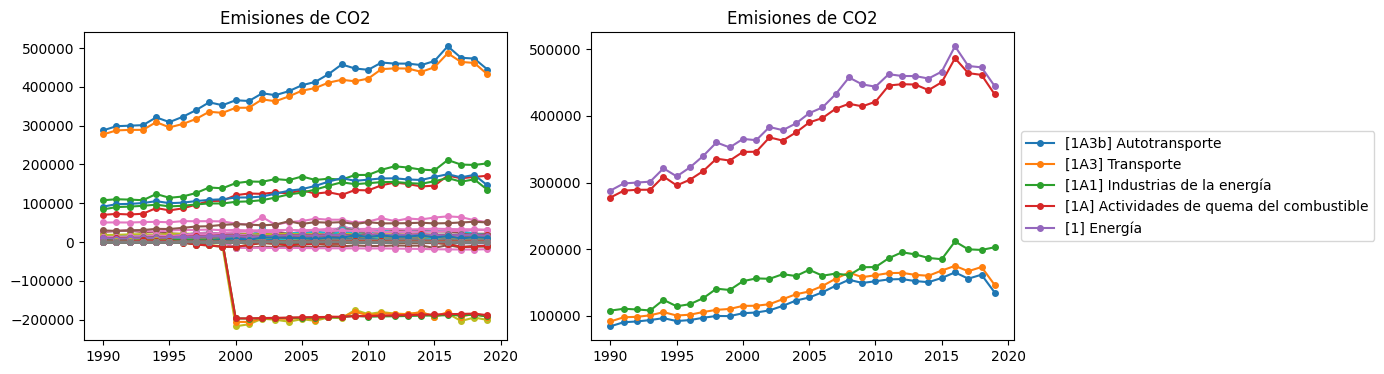

In [15]:
df = co2_df
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de CO2')
        
for col in col_arr[-5:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de CO2')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

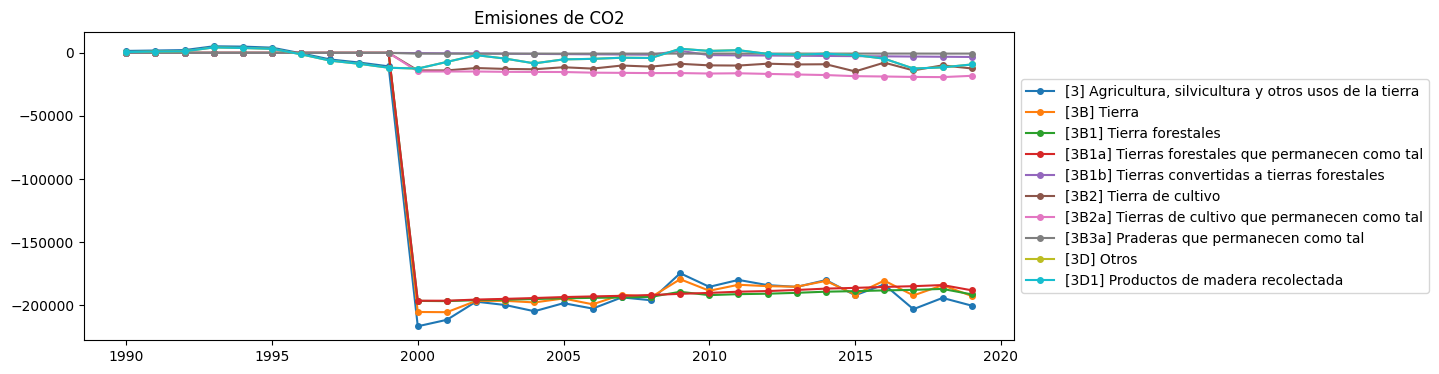

In [16]:
df = co2_df
cols = (df < 0).any()
cols = df.columns[cols]

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax.plot(df[col], 'o', ls='-', ms=4, label=col)
        ax.set_title(f'Emisiones de CO2')
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [17]:
HTML(ch4_df.to_html())

,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,[1A2c] Sustancias químicas,"[1A2d] Pulpa, papel e imprenta","[1A2e] Procesamiento de alimentos, bebidas y tabaco",[1A2f] Minerales no metálicos,[1A2g] Equipo de transporte,[1A2h] Maquinaria,[1A2i] Minería (con excepción de combustibles) y cantería,[1A2j] Madera y productos de la madera,[1A2k] Construcción,[1A2l] Textiles y cueros,[1A2m] Industria no especificada,[1A3] Transporte,[1A3a] Aviación civil,[1A3b] Autotransporte,[1A3c] Ferrocarriles,[1A3d] Navegación marítima y fluvial,[1A3e] Otro transporte,[1A4] Otros sectores,[1A4a] Comercial/institucional,[1A4b] Residencial,[1A4c] Agropecuario/silvicultura/pesca/piscifactorías,[1B] Emisiones fugitivas provenientes de la fabricación de combustibles,[1B1] Combustibles sólidos,[1B1a] Minería carbonífera y manejo del carbón,[1B1ai] Minas subterráneas,[1B1aii] Minas superficie,[1B1b] Combustión espontánea y vertederos para quema de carbón,[1B2] Petróleo y gas natural,[1B2a] Petróleo,1B2ai Venteo petróleo,1B2aii Quemado petróleo,1B2aiii Otras fugitivas petróleo,[1B2b] Gas natural,1B2bi Venteo gas natural,1B2bii Quemado gas natural,1B2biii Otras fugitivas gas natural,[2] Procesos industriales y uso de productos,[2A] Industria de los minerales,[2A1] Producción de cemento,[2A2] Producción de cal,[2A3] Producción de vidrio,[2A4] Otros usos de carbonatos,[2A5] Otros,[2B] Industria química,[2B1] Producción de amoniaco,[2B2] Producción de ácido nítrico,[2B3] Producción de ácido adípico,"[2B4] Producción de caprolactama, glioxil y ácido glioxílico",[2B5] Producción de carburo,[2B6] Producción de dióxido de titanio,[2B7] Producción de ceniza de sosa,[2B8] Producción petroquímica y negro de humo,[2B9] Producción fluoroquímica,[2B10] Otros,[2C] Industria de los metales,[2C1] Producción de hierro y acero,[2C2] Producción de ferroaleaciones,[2C3] Producción de aluminio,[2C4] Producción de magnesio,[2C5] Producción de plomo,[2C6] Producción de zinc,[2C7] Otros,[2D] Uso de productos no energéticos de combustibles y de solvente,[2D1] Uso de lubricantes,[2D2] Uso de la cera de parafina,[2D3] Uso de solventes,[2D4] Otros,[2E] Industria electrónica,[2E1] Circuitos integrados o semiconductores,[2E2] Pantalla plana tipo TFT,[2E3] Células fotovoltaicas,[2E4] Fluido de transferencia térmica,[2E5] Otros,[2F] Uso de productos sustitutos de las sustancias que agotan la capa de ozono,[2F1] Refrigeración y aire acondicionado,[2F2] Agentes espumantes,[2F3] Protección contra incendios,[2F4] Aerosoles,[2F5] Solventes,[2F6] Otras aplicaciones,[2G] Manufactura y utilización de otros productos,[2G1] Equipos eléctricos,[2G2] SF6 y PFC de otros usos de productos,[2G3] N2O de usos de productos,[2G4] Otros,[2H] Otros,[2H1] Industria de la pulpa y el papel,[2H2] Industria de la alimentación y las bebidas,[2H3] Otros,"[3] Agricultura, silvicultura y otros usos de la tierra",[3A] Ganado,[3A1] Fermentación entérica,[3A1a] Bovino,[3A1b] Búfalos,[3A1c] Ovinos,[3A1d] Caprino,[3A1e] Camello,[3A1f] Caballos,[3A1g] Mulas y asnos,[3A1h] Porcinos,[3A1i] Otros (especificar),[3A2] Gestión del estiércol,[3A2a] Bovinos,[3A2b] Búfalos,[3A2c] Ovinos,[3A2d] Caprino,[3A2e] Camello,[3A2f] Caballos,[3A2g] Mulas y asnos,[3A2h] Porcinos,[3A2i] Aves de corral,[3A2g] Otros (especificar),[3B] Tierra,[3B1] Tierra forestales,[3B1a] Tierras forestales que permanecen como tal,[3B1b] Tierras convertidas a tierras forestales,[3B2] Tierra de cultivo,[3B2a] Tierras de cultivo que permanecen como tal,[3B2b] Tierras convertidas a tierras de cultivo,[3B3] Praderas,[3B3a] Praderas que permanecen como tal,[3B3b] Tierras convertidas en praderas,[3B4] Humedales,[3B4a] Humedales que permanecen como tal,[3B4b] Tierras 

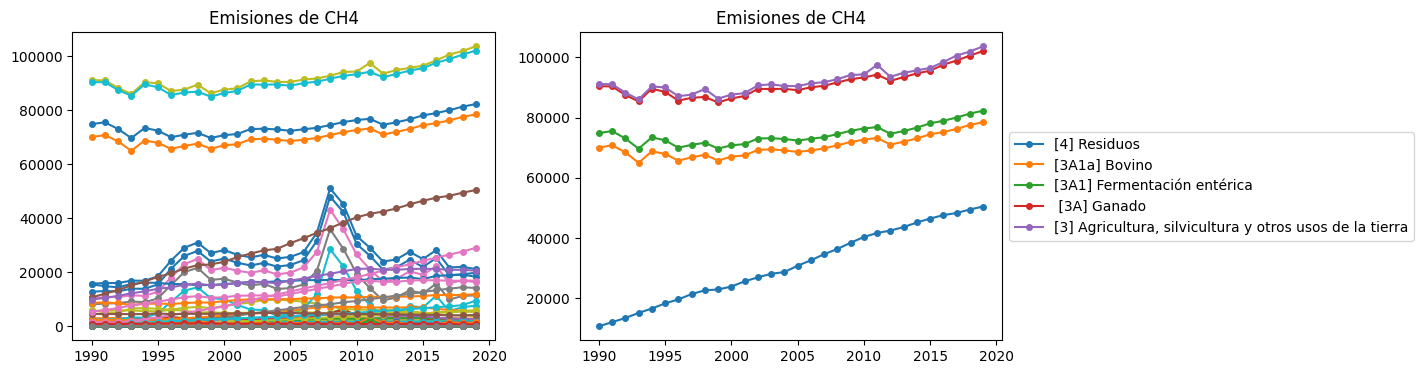

In [18]:
# df = ch4_df
# cols = df.columns
# fig, ax = plt.subplots(figsize=(6, 6))
# for col in df.columns:
#     if col != "Total":
#         ax.plot(df[col], 'o', ls='-', ms=4,)
#         ax.set_title(f'Emisiones de CH4')
df = ch4_df
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de CH4')
        
for col in col_arr[-5:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de CH4')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [19]:
HTML(n2o_df.to_html())

,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,[1A2c] Sustancias químicas,"[1A2d] Pulpa, papel e imprenta","[1A2e] Procesamiento de alimentos, bebidas y tabaco",[1A2f] Minerales no metálicos,[1A2g] Equipo de transporte,[1A2h] Maquinaria,[1A2i] Minería (con excepción de combustibles) y cantería,[1A2j] Madera y productos de la madera,[1A2k] Construcción,[1A2l] Textiles y cueros,[1A2m] Industria no especificada,[1A3] Transporte,[1A3a] Aviación civil,[1A3b] Autotransporte,[1A3c] Ferrocarriles,[1A3d] Navegación marítima y fluvial,[1A3e] Otro transporte,[1A4] Otros sectores,[1A4a] Comercial/institucional,[1A4b] Residencial,[1A4c] Agropecuario/silvicultura/pesca/piscifactorías,[1B] Emisiones fugitivas provenientes de la fabricación de combustibles,[1B1] Combustibles sólidos,[1B1a] Minería carbonífera y manejo del carbón,[1B1ai] Minas subterráneas,[1B1aii] Minas superficie,[1B1b] Combustión espontánea y vertederos para quema de carbón,[1B2] Petróleo y gas natural,[1B2a] Petróleo,1B2ai Venteo petróleo,1B2aii Quemado petróleo,1B2aiii Otras fugitivas petróleo,[1B2b] Gas natural,1B2bi Venteo gas natural,1B2bii Quemado gas natural,1B2biii Otras fugitivas gas natural,[2] Procesos industriales y uso de productos,[2A] Industria de los minerales,[2A1] Producción de cemento,[2A2] Producción de cal,[2A3] Producción de vidrio,[2A4] Otros usos de carbonatos,[2A5] Otros,[2B] Industria química,[2B1] Producción de amoniaco,[2B2] Producción de ácido nítrico,[2B3] Producción de ácido adípico,"[2B4] Producción de caprolactama, glioxil y ácido glioxílico",[2B5] Producción de carburo,[2B6] Producción de dióxido de titanio,[2B7] Producción de ceniza de sosa,[2B8] Producción petroquímica y negro de humo,[2B9] Producción fluoroquímica,[2B10] Otros,[2C] Industria de los metales,[2C1] Producción de hierro y acero,[2C2] Producción de ferroaleaciones,[2C3] Producción de aluminio,[2C4] Producción de magnesio,[2C5] Producción de plomo,[2C6] Producción de zinc,[2C7] Otros,[2D] Uso de productos no energéticos de combustibles y de solvente,[2D1] Uso de lubricantes,[2D2] Uso de la cera de parafina,[2D3] Uso de solventes,[2D4] Otros,[2E] Industria electrónica,[2E1] Circuitos integrados o semiconductores,[2E2] Pantalla plana tipo TFT,[2E3] Células fotovoltaicas,[2E4] Fluido de transferencia térmica,[2E5] Otros,[2F] Uso de productos sustitutos de las sustancias que agotan la capa de ozono,[2F1] Refrigeración y aire acondicionado,[2F2] Agentes espumantes,[2F3] Protección contra incendios,[2F4] Aerosoles,[2F5] Solventes,[2F6] Otras aplicaciones,[2G] Manufactura y utilización de otros productos,[2G1] Equipos eléctricos,[2G2] SF6 y PFC de otros usos de productos,[2G3] N2O de usos de productos,[2G4] Otros,[2H] Otros,[2H1] Industria de la pulpa y el papel,[2H2] Industria de la alimentación y las bebidas,[2H3] Otros,"[3] Agricultura, silvicultura y otros usos de la tierra",[3A] Ganado,[3A1] Fermentación entérica,[3A1a] Bovino,[3A1b] Búfalos,[3A1c] Ovinos,[3A1d] Caprino,[3A1e] Camello,[3A1f] Caballos,[3A1g] Mulas y asnos,[3A1h] Porcinos,[3A1i] Otros (especificar),[3A2] Gestión del estiércol,[3A2a] Bovinos,[3A2b] Búfalos,[3A2c] Ovinos,[3A2d] Caprino,[3A2e] Camello,[3A2f] Caballos,[3A2g] Mulas y asnos,[3A2h] Porcinos,[3A2i] Aves de corral,[3A2g] Otros (especificar),[3B] Tierra,[3B1] Tierra forestales,[3B1a] Tierras forestales que permanecen como tal,[3B1b] Tierras convertidas a tierras forestales,[3B2] Tierra de cultivo,[3B2a] Tierras de cultivo que permanecen como tal,[3B2b] Tierras convertidas a tierras de cultivo,[3B3] Praderas,[3B3a] Praderas que permanecen como tal,[3B3b] Tierras convertidas en praderas,[3B4] Humedales,[3B4a] Humedales que permanecen como tal,[3B4b] Tierras 

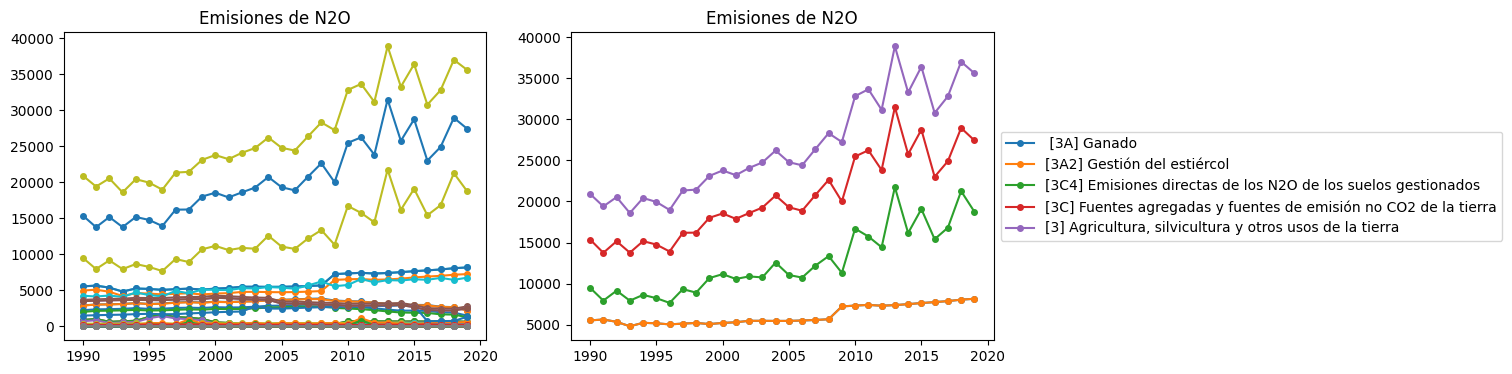

In [20]:
df = n2o_df
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de N2O')
        
for col in col_arr[-5:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de N2O')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [21]:
co2_df_zeros = co2_df.copy()
co2_df_absolute = co2_df.copy()
ex = (co2_df < 0)
co2_df_zeros[ex] = 0
co2_df_absolute[ex] = co2_df_absolute[ex].abs()
co2_df.columns[ex.any() == True]

Index(['[3] Agricultura, silvicultura y otros usos de la tierra',
       '[3B] Tierra', '[3B1] Tierra forestales',
       '[3B1a] Tierras forestales que permanecen como tal',
       '[3B1b] Tierras convertidas a tierras forestales',
       '[3B2] Tierra de cultivo',
       '[3B2a] Tierras de cultivo que permanecen como tal',
       '[3B3a] Praderas que permanecen como tal', '[3D] Otros',
       '[3D1] Productos de madera recolectada'],
      dtype='object')

In [22]:
co2_df_zeros = co2_df_zeros.drop(columns='Total')
co2_df_zeros.loc[:, 'Total'] = co2_df_zeros[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
HTML(co2_df_zeros.to_html())

,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,[1A2c] Sustancias químicas,"[1A2d] Pulpa, papel e imprenta","[1A2e] Procesamiento de alimentos, bebidas y tabaco",[1A2f] Minerales no metálicos,[1A2g] Equipo de transporte,[1A2h] Maquinaria,[1A2i] Minería (con excepción de combustibles) y cantería,[1A2j] Madera y productos de la madera,[1A2k] Construcción,[1A2l] Textiles y cueros,[1A2m] Industria no especificada,[1A3] Transporte,[1A3a] Aviación civil,[1A3b] Autotransporte,[1A3c] Ferrocarriles,[1A3d] Navegación marítima y fluvial,[1A3e] Otro transporte,[1A4] Otros sectores,[1A4a] Comercial/institucional,[1A4b] Residencial,[1A4c] Agropecuario/silvicultura/pesca/piscifactorías,[1B] Emisiones fugitivas provenientes de la fabricación de combustibles,[1B1] Combustibles sólidos,[1B1a] Minería carbonífera y manejo del carbón,[1B1ai] Minas subterráneas,[1B1aii] Minas superficie,[1B1b] Combustión espontánea y vertederos para quema de carbón,[1B2] Petróleo y gas natural,[1B2a] Petróleo,1B2ai Venteo petróleo,1B2aii Quemado petróleo,1B2aiii Otras fugitivas petróleo,[1B2b] Gas natural,1B2bi Venteo gas natural,1B2bii Quemado gas natural,1B2biii Otras fugitivas gas natural,[2] Procesos industriales y uso de productos,[2A] Industria de los minerales,[2A1] Producción de cemento,[2A2] Producción de cal,[2A3] Producción de vidrio,[2A4] Otros usos de carbonatos,[2A5] Otros,[2B] Industria química,[2B1] Producción de amoniaco,[2B2] Producción de ácido nítrico,[2B3] Producción de ácido adípico,"[2B4] Producción de caprolactama, glioxil y ácido glioxílico",[2B5] Producción de carburo,[2B6] Producción de dióxido de titanio,[2B7] Producción de ceniza de sosa,[2B8] Producción petroquímica y negro de humo,[2B9] Producción fluoroquímica,[2B10] Otros,[2C] Industria de los metales,[2C1] Producción de hierro y acero,[2C2] Producción de ferroaleaciones,[2C3] Producción de aluminio,[2C4] Producción de magnesio,[2C5] Producción de plomo,[2C6] Producción de zinc,[2C7] Otros,[2D] Uso de productos no energéticos de combustibles y de solvente,[2D1] Uso de lubricantes,[2D2] Uso de la cera de parafina,[2D3] Uso de solventes,[2D4] Otros,[2E] Industria electrónica,[2E1] Circuitos integrados o semiconductores,[2E2] Pantalla plana tipo TFT,[2E3] Células fotovoltaicas,[2E4] Fluido de transferencia térmica,[2E5] Otros,[2F] Uso de productos sustitutos de las sustancias que agotan la capa de ozono,[2F1] Refrigeración y aire acondicionado,[2F2] Agentes espumantes,[2F3] Protección contra incendios,[2F4] Aerosoles,[2F5] Solventes,[2F6] Otras aplicaciones,[2G] Manufactura y utilización de otros productos,[2G1] Equipos eléctricos,[2G2] SF6 y PFC de otros usos de productos,[2G3] N2O de usos de productos,[2G4] Otros,[2H] Otros,[2H1] Industria de la pulpa y el papel,[2H2] Industria de la alimentación y las bebidas,[2H3] Otros,"[3] Agricultura, silvicultura y otros usos de la tierra",[3A] Ganado,[3A1] Fermentación entérica,[3A1a] Bovino,[3A1b] Búfalos,[3A1c] Ovinos,[3A1d] Caprino,[3A1e] Camello,[3A1f] Caballos,[3A1g] Mulas y asnos,[3A1h] Porcinos,[3A1i] Otros (especificar),[3A2] Gestión del estiércol,[3A2a] Bovinos,[3A2b] Búfalos,[3A2c] Ovinos,[3A2d] Caprino,[3A2e] Camello,[3A2f] Caballos,[3A2g] Mulas y asnos,[3A2h] Porcinos,[3A2i] Aves de corral,[3A2g] Otros (especificar),[3B] Tierra,[3B1] Tierra forestales,[3B1a] Tierras forestales que permanecen como tal,[3B1b] Tierras convertidas a tierras forestales,[3B2] Tierra de cultivo,[3B2a] Tierras de cultivo que permanecen como tal,[3B2b] Tierras convertidas a tierras de cultivo,[3B3] Praderas,[3B3a] Praderas que permanecen como tal,[3B3b] Tierras convertidas en praderas,[3B4] Humedales,[3B4a] Humedales que permanecen como tal,[3B4b] Tierras 

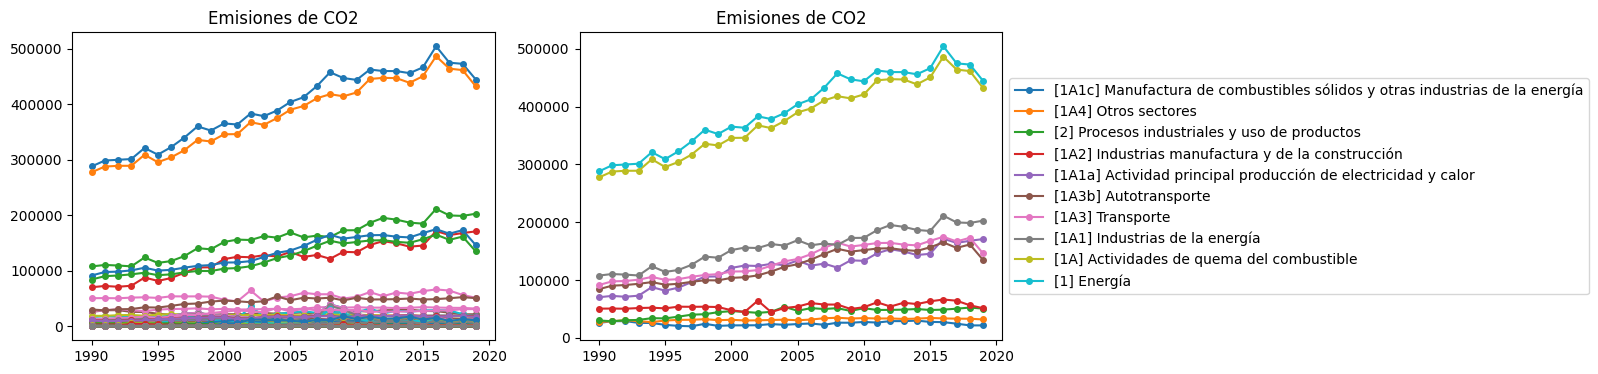

In [23]:
df = co2_df_zeros
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de CO2')
        
for col in col_arr[-10:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de CO2')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [24]:
co2_df_absolute = co2_df_absolute.drop(columns='Total')
co2_df_absolute.loc[:, 'Total'] = co2_df_absolute[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
HTML(co2_df_absolute.to_html())

,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,[1A2c] Sustancias químicas,"[1A2d] Pulpa, papel e imprenta","[1A2e] Procesamiento de alimentos, bebidas y tabaco",[1A2f] Minerales no metálicos,[1A2g] Equipo de transporte,[1A2h] Maquinaria,[1A2i] Minería (con excepción de combustibles) y cantería,[1A2j] Madera y productos de la madera,[1A2k] Construcción,[1A2l] Textiles y cueros,[1A2m] Industria no especificada,[1A3] Transporte,[1A3a] Aviación civil,[1A3b] Autotransporte,[1A3c] Ferrocarriles,[1A3d] Navegación marítima y fluvial,[1A3e] Otro transporte,[1A4] Otros sectores,[1A4a] Comercial/institucional,[1A4b] Residencial,[1A4c] Agropecuario/silvicultura/pesca/piscifactorías,[1B] Emisiones fugitivas provenientes de la fabricación de combustibles,[1B1] Combustibles sólidos,[1B1a] Minería carbonífera y manejo del carbón,[1B1ai] Minas subterráneas,[1B1aii] Minas superficie,[1B1b] Combustión espontánea y vertederos para quema de carbón,[1B2] Petróleo y gas natural,[1B2a] Petróleo,1B2ai Venteo petróleo,1B2aii Quemado petróleo,1B2aiii Otras fugitivas petróleo,[1B2b] Gas natural,1B2bi Venteo gas natural,1B2bii Quemado gas natural,1B2biii Otras fugitivas gas natural,[2] Procesos industriales y uso de productos,[2A] Industria de los minerales,[2A1] Producción de cemento,[2A2] Producción de cal,[2A3] Producción de vidrio,[2A4] Otros usos de carbonatos,[2A5] Otros,[2B] Industria química,[2B1] Producción de amoniaco,[2B2] Producción de ácido nítrico,[2B3] Producción de ácido adípico,"[2B4] Producción de caprolactama, glioxil y ácido glioxílico",[2B5] Producción de carburo,[2B6] Producción de dióxido de titanio,[2B7] Producción de ceniza de sosa,[2B8] Producción petroquímica y negro de humo,[2B9] Producción fluoroquímica,[2B10] Otros,[2C] Industria de los metales,[2C1] Producción de hierro y acero,[2C2] Producción de ferroaleaciones,[2C3] Producción de aluminio,[2C4] Producción de magnesio,[2C5] Producción de plomo,[2C6] Producción de zinc,[2C7] Otros,[2D] Uso de productos no energéticos de combustibles y de solvente,[2D1] Uso de lubricantes,[2D2] Uso de la cera de parafina,[2D3] Uso de solventes,[2D4] Otros,[2E] Industria electrónica,[2E1] Circuitos integrados o semiconductores,[2E2] Pantalla plana tipo TFT,[2E3] Células fotovoltaicas,[2E4] Fluido de transferencia térmica,[2E5] Otros,[2F] Uso de productos sustitutos de las sustancias que agotan la capa de ozono,[2F1] Refrigeración y aire acondicionado,[2F2] Agentes espumantes,[2F3] Protección contra incendios,[2F4] Aerosoles,[2F5] Solventes,[2F6] Otras aplicaciones,[2G] Manufactura y utilización de otros productos,[2G1] Equipos eléctricos,[2G2] SF6 y PFC de otros usos de productos,[2G3] N2O de usos de productos,[2G4] Otros,[2H] Otros,[2H1] Industria de la pulpa y el papel,[2H2] Industria de la alimentación y las bebidas,[2H3] Otros,"[3] Agricultura, silvicultura y otros usos de la tierra",[3A] Ganado,[3A1] Fermentación entérica,[3A1a] Bovino,[3A1b] Búfalos,[3A1c] Ovinos,[3A1d] Caprino,[3A1e] Camello,[3A1f] Caballos,[3A1g] Mulas y asnos,[3A1h] Porcinos,[3A1i] Otros (especificar),[3A2] Gestión del estiércol,[3A2a] Bovinos,[3A2b] Búfalos,[3A2c] Ovinos,[3A2d] Caprino,[3A2e] Camello,[3A2f] Caballos,[3A2g] Mulas y asnos,[3A2h] Porcinos,[3A2i] Aves de corral,[3A2g] Otros (especificar),[3B] Tierra,[3B1] Tierra forestales,[3B1a] Tierras forestales que permanecen como tal,[3B1b] Tierras convertidas a tierras forestales,[3B2] Tierra de cultivo,[3B2a] Tierras de cultivo que permanecen como tal,[3B2b] Tierras convertidas a tierras de cultivo,[3B3] Praderas,[3B3a] Praderas que permanecen como tal,[3B3b] Tierras convertidas en praderas,[3B4] Humedales,[3B4a] Humedales que permanecen como tal,[3B4b] Tierras 

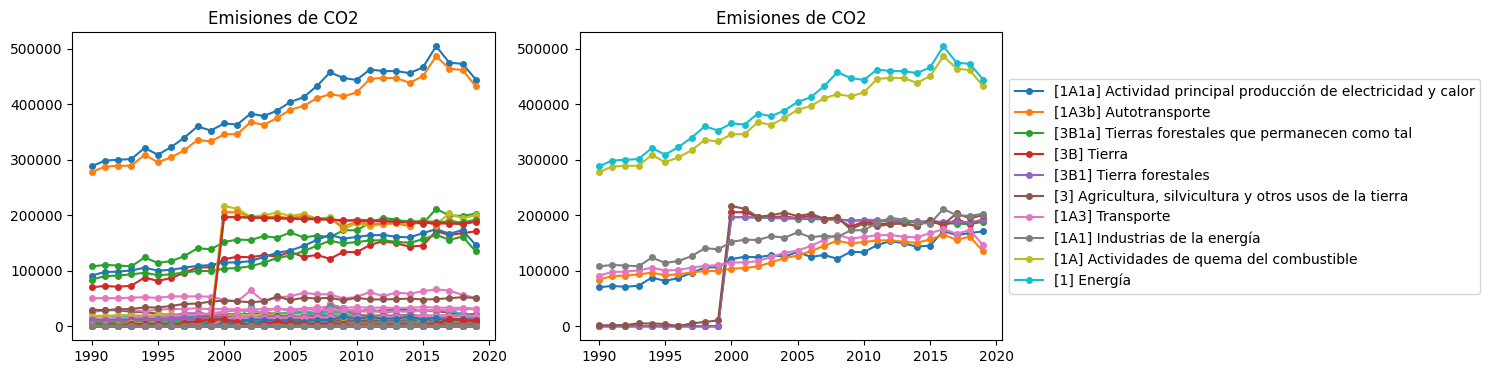

In [25]:
df = co2_df_absolute
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))

for col in cols:
    if col != "Total":
        ax0.plot(df[col], 'o', ls='-', ms=4)
        ax0.set_title(f'Emisiones de CO2')
        
for col in col_arr[-10:]:
    col = col[0]
    ax1.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax1.set_title(f'Emisiones de CO2')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [26]:
ghg_df = pd.DataFrame()
ghg_df.loc[:, 'Total_CO2'] = co2_df[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
ghg_df.loc[:, 'Total_CH4'] = ch4_df[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
ghg_df.loc[:, 'Total_N2O'] = n2o_df[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
ghg_df.loc[:, 'Total_CO2_cero'] = co2_df_zeros['Total']
ghg_df.loc[:, 'Total_CO2_abs'] = co2_df_absolute['Total']

In [27]:
ghg_df

,Total_CO2,Total_CH4,Total_N2O,Total_CO2_cero,Total_CO2_abs
Year,,,,,
1990,319999.845435,117840.420107,28337.973001,319999.845435,319999.845435
1991,329716.352941,119392.866648,27177.033418,329716.352941,329716.352941
1992,333049.711791,117998.461475,27988.131344,333049.711791,333049.711791
1993,338075.107079,118275.355124,26219.010955,338075.107079,338075.107079
1994,360853.347739,124026.181048,28335.696073,360853.347739,360853.347739
1995,347496.645328,127038.456512,28258.992991,347496.645328,347496.645328
1996,359553.271340,131254.597197,27629.111445,359916.255860,360279.240381
1997,375317.236119,138365.118857,29935.230411,380543.586699,385769.937279
1998,393944.486939,143331.786281,30056.780952,401618.538463,409292.589987


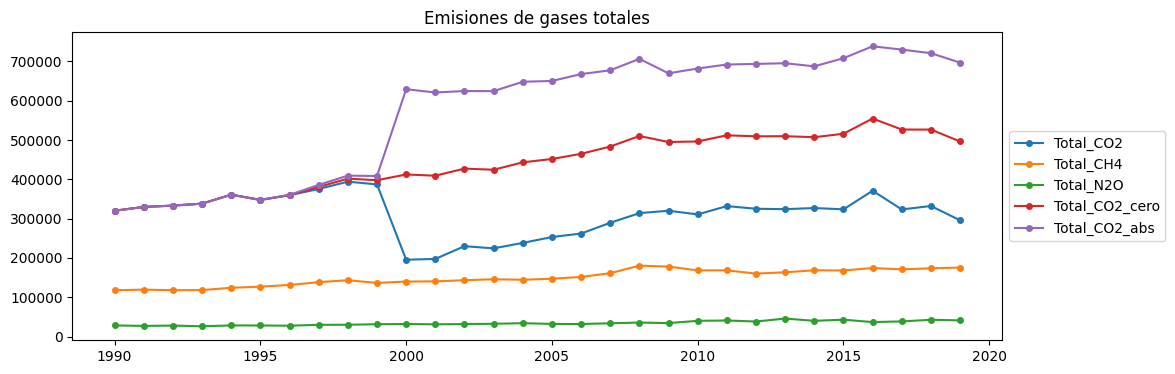

In [28]:
df = ghg_df
cols = df.columns
col_arr = sorted([(col, df[col].sum()) for col in cols if col != 'Total'], key=lambda tup: tup[1])
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

for col in cols:
    ax.plot(df[col], 'o', ls='-', ms=4, label=col)
    ax.set_title(f'Emisiones de gases totales')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [35]:
index = pd.date_range(start="1990", end="2020", freq="A")
aust = pd.Series(ghg_df['Total_CO2'], index)

fit1 = SimpleExpSmoothing(aust, initialization_method='heuristic').fit(
    smoothing_level=0.2, optimized=False
)

fit2 = SimpleExpSmoothing(aust, initialization_method='heuristic').fit(
    smoothing_level=0.6, optimized=False
)

fit3 = SimpleExpSmoothing(aust, initialization_method='estimated').fit()

D:\Daniel\ghg-forecasting\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


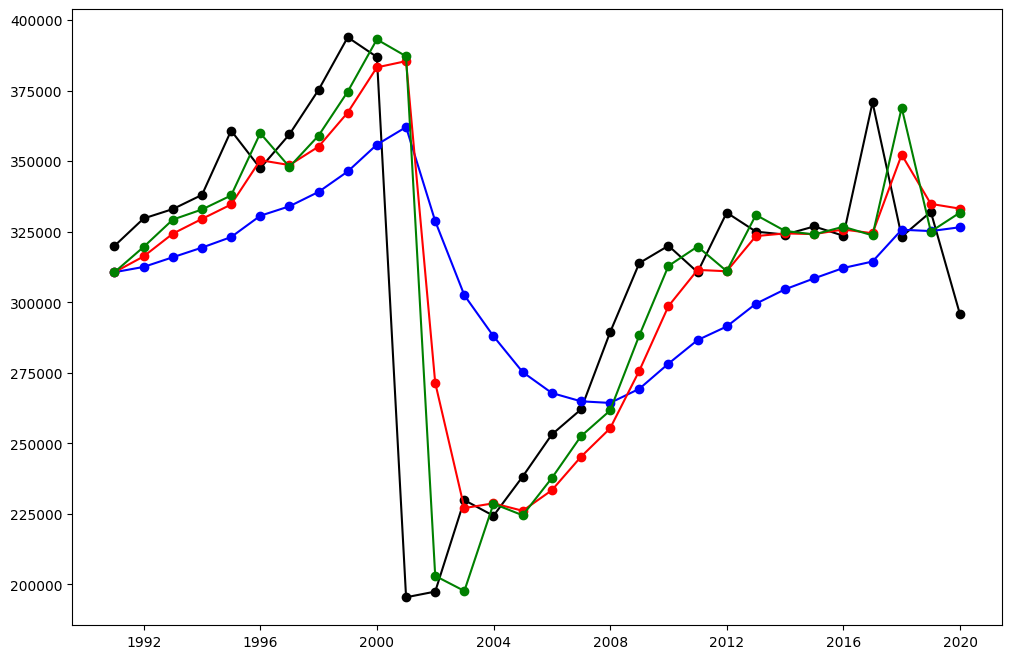

In [36]:
plt.figure(figsize=(12, 8))
plt.plot(aust, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")